# COMP90086 Workshop 2 Solutions

#  Exercise

(1) Read the bird image 

(2) Resize the image to (224,224) using bicubic interpolation method. 

(3) Crop the center region of the resized image. The crop size is 128 for width and 156 for height. 

(4) Generate a deep copy of the crop image. Set the red channel of the copy  image to be the average value of the green channel and blue channel for each pixel. 

(5) Put the images in step 1-4 in different plots of a figure. Set up a subplot grid with height 2 and width 2.

(6) A camera with a sensor size of 20 x 30 mm (which corresponds to a 200 x 300 pixel image) is aligned with a flat surface. An object which is 12 cm tall is placed at a distance of 60 cm from the camera to produce the image shown below. The top of the object is exactly aligned with the top edge of the image (the object is 100px high in the image). You can assume the optical centre of the camera is in the centre of the image. What is the focal length of the camera?

**Please place this .ipynb in the same path as the "kodim23.png" image, i.e. in the "week2" folder**

(1) Read the bird image

In [1]:
import cv2
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

rootpath='./'
bird= cv2.imread(os.path.join(rootpath, "kodim23.png"))

(2) Resize the image to (224,224) using bicubic interpolation method.

In [2]:
def convey_img(image, *args, **kwargs):
    if len(image.shape) == 3:
      # Height, width, channels
      # Assume BGR, do a conversion since 
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
      # Height, width - must be grayscale
      # convert to RGB, since matplotlib will plot in a weird colormap (instead of black = 0, white = 1)
      image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    # Draw the image
    return image

In [3]:
new_width=224
new_height=224

resize_img= cv2.resize(bird, (new_width, new_height),interpolation = cv2.INTER_CUBIC)

(3) Crop the center region of the resized image. The crop size is 128 for width and 156 for height. 

In [4]:
def crop_center(image, crop_size_w, crop_size_h): # we assume that crop_size is the same for both width and height. we can set different values.
    height=image.shape[0] 
    width=image.shape[1] 
    upper_crop=(height-crop_size_h)//2  
    left_crop=(width-crop_size_w)//2 
    return image[upper_crop:upper_crop+crop_size_h,left_crop:left_crop+crop_size_w,:]

center_crop=crop_center(resize_img,128,156)

(4) Generate a deep copy of the crop image. Set the red channel of the copy image to be the average value of the green channel and blue channel for each pixel.

In [5]:
copy_img=center_crop.copy()
blue_channel=copy_img[:,:,0]
green_channel=copy_img[:,:,1]
red_channel=blue_channel/2+green_channel/2
copy_img[:,:,2]=red_channel

(5) Put the images in step 1-4 in different plots of a figure. Set up a subplot grid with height 2 and width 2.

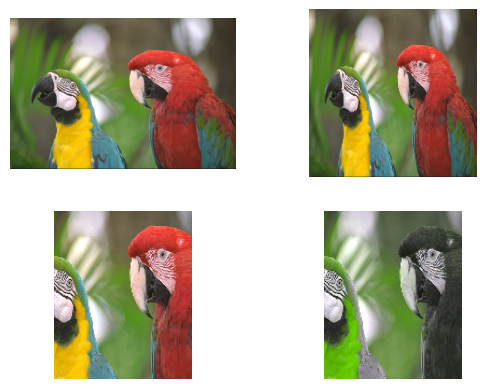

In [6]:
plt.subplot(2, 2, 1)
bird_s=convey_img(bird) #try to command this line, see what happens.
plt.imshow(bird_s)
plt.axis('off')

plt.subplot(2, 2, 2)
resize_img_s=convey_img(resize_img) #try to command this line, see what happens.
plt.imshow(resize_img_s)
plt.axis('off')

plt.subplot(2, 2, 3)
center_crop_s=convey_img(center_crop) #try to command this line, see what happens.
plt.imshow(center_crop_s)
plt.axis('off')

plt.subplot(2, 2, 4)
copy_img_s=convey_img(copy_img) #try to command this line, see what happens.
plt.imshow(copy_img_s)
plt.axis('off')

plt.show()

(6) A camera with a sensor size of 20 x 30 mm (which corresponds to a 200 x 300 pixel image) is aligned with a flat surface. An object which is 12 cm tall is placed at a distance of 60 cm from the camera to produce the image shown below. The top of the object is exactly aligned with the top edge of the image (the object is 100px high in the image). You can assume the optical centre of the camera is in the centre of the image. What is the focal length of the camera?

<img src="./focal.png" style="height:400px">

$f = \frac{10mm\times 600mm}{120mm}$

$f = 50 mm$